<a href="https://colab.research.google.com/github/himanshivarma/chatGPT/blob/main/chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT Sentiment Analysis Using ML and NLP

In [ ]:
#import the DEPENDENCIES
from nltk.util import pr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# DATA COLLECTION

In [6]:
#data loading in pandas
data=pd.read_csv('file.csv')

In [7]:
#check first five rows 
data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [8]:
#check last five rows
data.tail()

,Unnamed: 0,tweets,labels
14042,14042,can chatgpt tell me when to short/long or nah,bad
14043,14043,ChatGPT’s user experience and implementation ‘...,bad
14044,14044,Long live ChatGPT! https://t.co/wUPEgNIHXc,bad
14045,14045,Maybe Protip: You can use ChatGPT to get recip...,neutral
14046,14046,Daily Crunch: ChatGPT’s consumer expertise and...,NaN


In [9]:
#check shape
data.shape

(14047, 3)

In [10]:
#check more infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14047 entries, 0 to 14046
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14047 non-null  int64 
 1   tweets      14047 non-null  object
 2   labels      14046 non-null  object
dtypes: int64(1), object(2)
memory usage: 329.4+ KB


In [11]:
#check missing value
data.isnull().sum()

Unnamed: 0    0
tweets        0
labels        1
dtype: int64

In [12]:
#check duplicated value in data set
data.duplicated().sum()

0

In [13]:
#check unused columns
del data['Unnamed: 0']

In [15]:
#clean data set
def clean(text):
 text = str(text).lower()
 text = re.sub('\[.*?\]', '', text)
 text = re.sub('https?://\S+|www\.\S+', '', text)
 text = re.sub('<.*?>+', '', text)
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 text = re.sub('\n', '', text)
 text = re.sub('\w*\d\w*', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ".join(text)
 text = [stemmer.stem(word) for word in text.split(' ')]
 text=" ".join(text)
 return text
data["tweets"] = data["tweets"].apply(clean)

In [16]:
#after check clean dataset
data.head()

,tweets,labels
0,chatgpt optim languag model dialogu openai,neutral
1,tri talk chatgpt new ai system optim dialogu f...,good
2,chatgpt optim languag model dialogu ai machin...,neutral
3,thrill share chatgpt new model optim dialog pu...,good
4,minut ago openai releas new chatgpt nnand use...,bad


In [17]:
#check value of labels
data['labels'].value_counts()

bad        6581
good       3972
neutral    3493
Name: labels, dtype: int64

In [24]:
import seaborn as sns
#sns.countplot(data['labels'])
data['labels'] = data['labels'].astype('category')


In [30]:
data['labels'] = data['labels'].astype('category')


In [28]:
data = data.dropna(subset=['labels'])



<Axes: xlabel='labels', ylabel='count'>

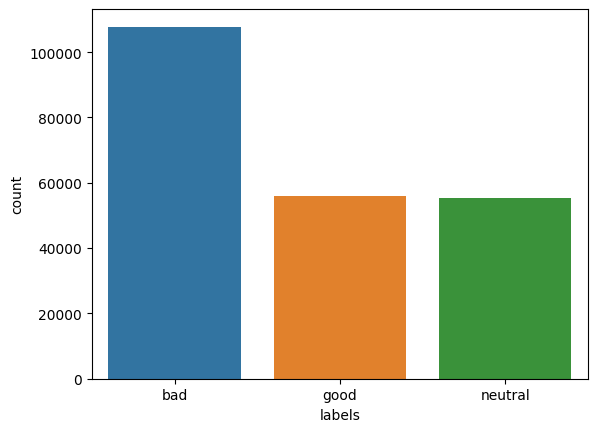

In [32]:
import seaborn as sns

sns.countplot(x='labels', data=data)


<Axes: ylabel='labels'>

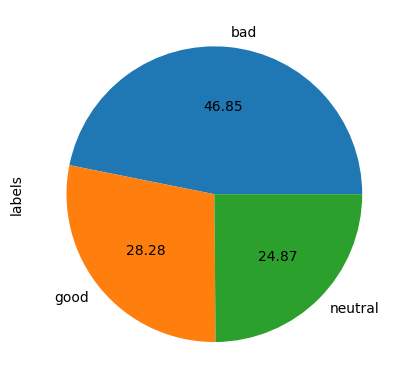

In [21]:
data['labels'].value_counts().plot(kind='pie',autopct='%.2f')

In [33]:
labels = data["labels"].value_counts()
numbers = labels.index
quantity = labels.values
import plotly.express as px
figure = px.pie(data, 
 values=quantity, 
 names=numbers,hole = 0.5)
figure.show()

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


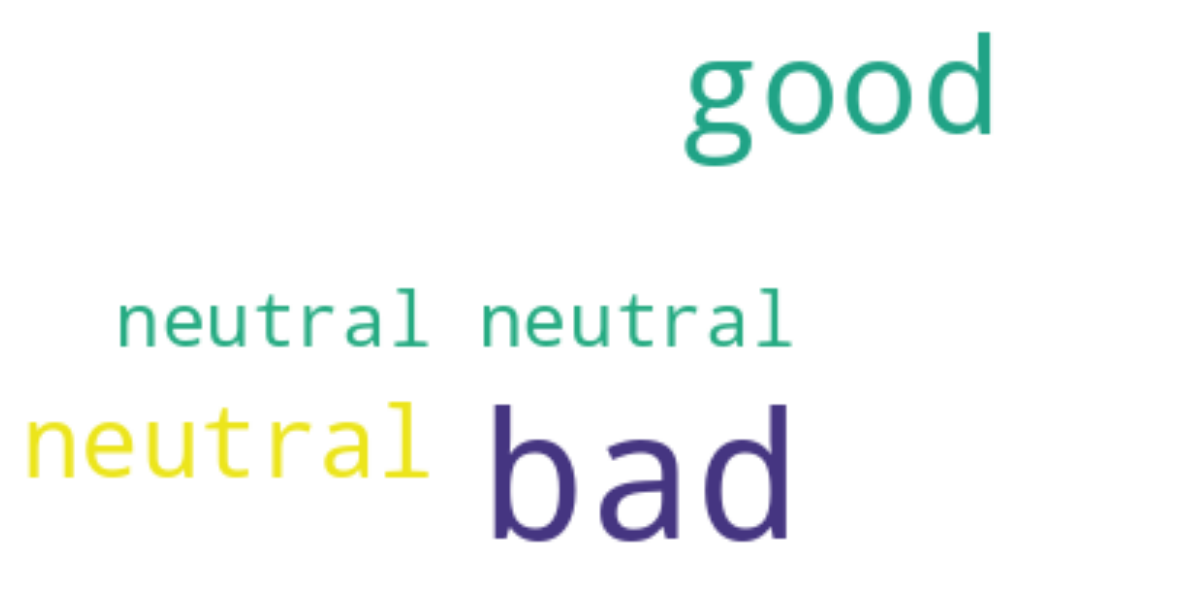

In [36]:
#The labels column of the data contains the labels given by every reviewer
text = " ".join(i for i in data.labels)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
 background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

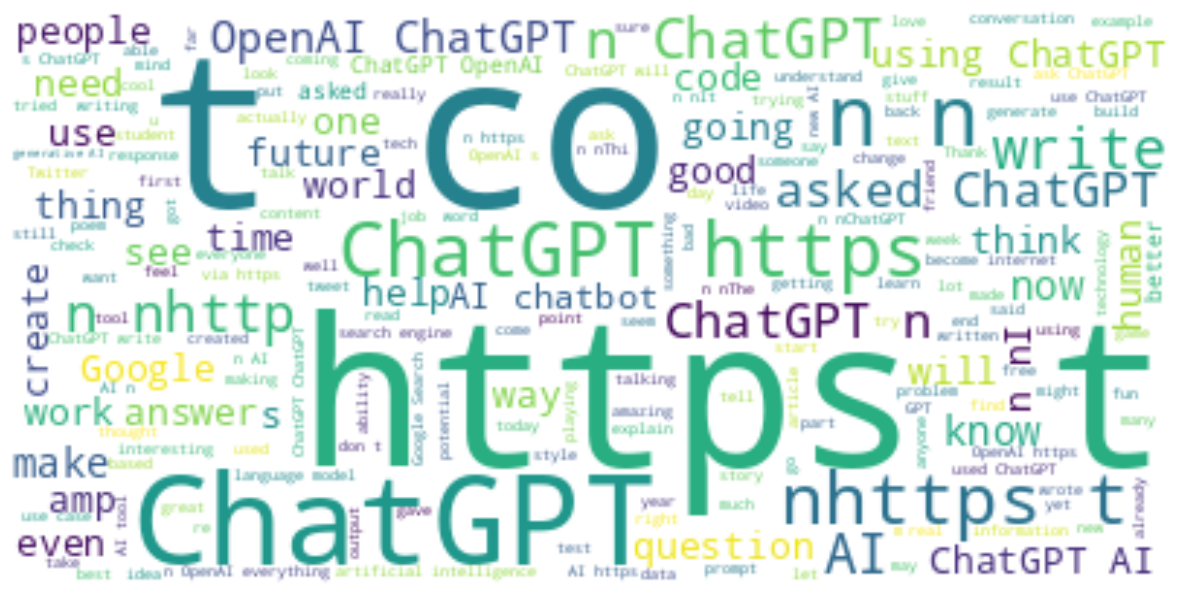

In [37]:
#The tweets column of the data contains the tweets given by every reviewer
text = " ".join(i for i in data.tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
 background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
#spliting the dataset
X = data['tweets'] 
Y = data['labels']

In [39]:
#loading CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [40]:
print(X)

  (0, 54099)	1
  (0, 168595)	1
  (0, 131543)	1
  (0, 145788)	1
  (0, 87673)	1
  (0, 67976)	1
  (0, 106255)	1
  (0, 57052)	1
  (0, 124279)	1
  (0, 168229)	1
  (1, 54099)	1
  (1, 87673)	1
  (1, 67976)	1
  (1, 106255)	1
  (1, 57052)	1
  (1, 219552)	1
  (1, 212364)	1
  (1, 239532)	1
  (1, 169806)	1
  (1, 154233)	1
  (1, 32394)	1
  (1, 210958)	1
  (1, 238764)	1
  (1, 114695)	1
  (1, 168590)	1
  :	:
  (219292, 42526)	1
  (219292, 237492)	1
  (219292, 200630)	1
  (219292, 88963)	1
  (219292, 172872)	1
  (219292, 37069)	1
  (219292, 205640)	1
  (219292, 206328)	1
  (219292, 250433)	1
  (219292, 64969)	1
  (219292, 217991)	1
  (219292, 6026)	1
  (219292, 159098)	1
  (219292, 178760)	1
  (219292, 219081)	1
  (219292, 160928)	1
  (219292, 9350)	1
  (219292, 14538)	1
  (219293, 54099)	1
  (219293, 106255)	1
  (219293, 57052)	1
  (219293, 88963)	1
  (219293, 208813)	1
  (219293, 153440)	1
  (219293, 184420)	1


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [42]:
print(Y)

[2 1 2 ... 0 0 2]


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [44]:
#Check shape of X_train and X_test or Y_train
print(X_train.shape, X_test.shape, Y_train.shape)

(153505, 260832) (65789, 260832) (153505,)


In [45]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score
#traing dataset accuracy score
train_test = lg.predict(X_train)
accuracy_score(train_test,Y_train)

0.9120745252597635

In [47]:
#test dataset accuracy score
test_data = lg.predict(X_test)
accuracy_score(test_data, Y_test)

0.8637310188633358

In [51]:
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report

preds = lg.predict(X_test)
print(classification_report(Y_test, preds))



              precision    recall  f1-score   support

           0       0.90      0.94      0.92     32293
           1       0.87      0.85      0.86     16776
           2       0.78      0.73      0.75     16720

    accuracy                           0.86     65789
   macro avg       0.85      0.84      0.84     65789
weighted avg       0.86      0.86      0.86     65789



In [52]:
#using from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [53]:
#model fit
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
#traing dataset accuracy score
train_test = DT.predict(X_train)
accuracy_score(train_test,Y_train)

0.9999804566626495

In [55]:
#test dataset accuracy score
test_data = DT.predict(X_test)
accuracy_score(test_data, Y_test)


0.7568438492757148

In [56]:
#classification report
preds = DT.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     32293
           1       0.71      0.68      0.70     16776
           2       0.61      0.62      0.62     16720

    accuracy                           0.76     65789
   macro avg       0.73      0.72      0.72     65789
weighted avg       0.76      0.76      0.76     65789



In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [58]:
preds = nb.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     32293
           1       0.59      0.86      0.70     16776
           2       0.66      0.26      0.38     16720

    accuracy                           0.71     65789
   macro avg       0.69      0.67      0.64     65789
weighted avg       0.72      0.71      0.69     65789



In [59]:
#HyperParameter Turing
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [60]:
# Hyperparameter tuning for Multinomial Naive Bayes model
param_grid = {"alpha": [0.1,0,1.0, 10, 100]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



[CV] END ............................................alpha=0; total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



[CV] END ............................................alpha=0; total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning:

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.



[CV] END ............................................alpha=0; total time=   0.2s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [61]:
grid_search.best_params_

{'alpha': 1.0}